In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Airline Dataset.csv")

In [3]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [4]:
df.tail()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
98614,58454,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Gareth Mugford,Cancelled
98615,22028,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,Cancelled
98616,61732,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Darrin Lucken,On Time
98617,19819,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,Cancelled
98618,14485,Wilhelmine,Touret,Female,10,Poland,Yoshkar-Ola Airport,RU,Russian Federation,EU,Europe,4/16/2022,JOK,Wilhelmine Touret,Delayed


In [5]:
df.shape

(98619, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Passenger ID,Age
count,98619.000000,98619.000000
mean,55168.689522,45.504021
std,25985.443696,25.929849
min,10000.000000,1.000000
25%,32608.000000,23.000000
50%,55338.000000,46.000000
75%,77695.000000,68.000000
max,99999.000000,90.000000


In [9]:
df.nunique()

Passenger ID            59871
First Name               8437
Last Name               41658
Gender                      2
Age                        90
Nationality               240
Airport Name             9062
Airport Country Code      235
Country Name              235
Airport Continent           6
Continents                  6
Departure Date            364
Arrival Airport          9024
Pilot Name              98610
Flight Status               3
dtype: int64

In [10]:
df.drop(["First Name","Last Name","Pilot Name","Airport Country Code"],axis = 1,inplace = True)

In [11]:
df["Departure Date"] = pd.to_datetime(df["Departure Date"])

In [12]:
df["year"] = df["Departure Date"].dt.year
df["month"] = df["Departure Date"].dt.strftime("%B")
df["day"] = df["Departure Date"].dt.day

In [13]:
df["year"].unique()

array([2022])

In [14]:
df.drop(["year","Departure Date"],axis = 1,inplace = True)

In [15]:
df.head(2)

,Passenger ID,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Arrival Airport,Flight Status,month,day
0,10856,Female,62,Japan,Coldfoot Airport,United States,NAM,North America,CXF,On Time,June,28
1,43872,Male,62,Nicaragua,Kugluktuk Airport,Canada,NAM,North America,YCO,On Time,December,26


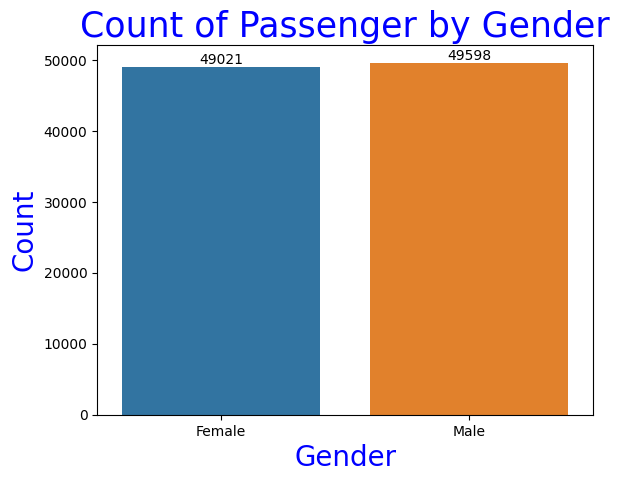

In [16]:
x = sns.countplot(x = df["Gender"],hue = "Gender",data = df)
for bar in x.containers:
    x.bar_label(bar)
plt.title("Count of Passenger by Gender",color = "blue",size = 25)
plt.xlabel("Gender",color = "blue",size = 20)
plt.ylabel("Count",color = "blue",size = 20)
plt.grid(False)
plt.show()

In [17]:
bin = (0, 15,30, 45, 60, 75,100)
df['Age Group'] = pd.cut(df['Age'], bins=bin)

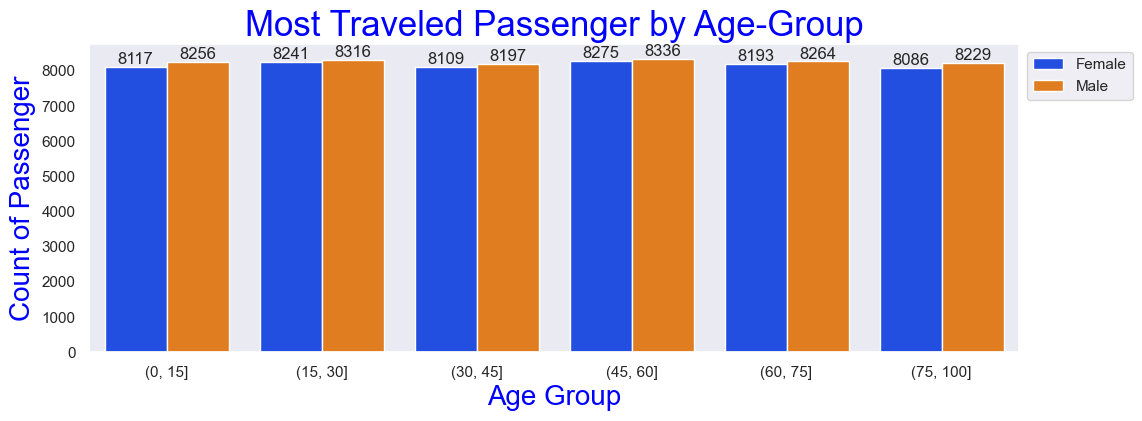

In [18]:
sns.set(rc = {"figure.figsize":(12,4)})
ax = sns.countplot(x = "Age Group",hue = "Gender",palette = "bright",data = df)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Most Traveled Passenger by Age-Group",color = "blue",size = 25)
plt.xlabel("Age Group",color = "blue",size = 20)
plt.ylabel("Count of Passenger",color = "blue",size = 20)
plt.legend(loc = "best",bbox_to_anchor=(1,1))
plt.grid(False)
plt.show()

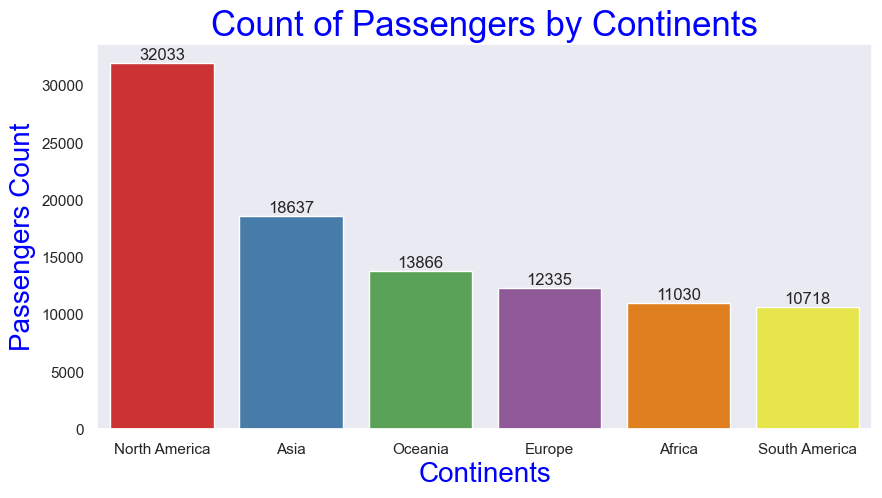

In [19]:
pass_count = df.groupby("Continents",as_index = False)["Passenger ID"].count().sort_values(by = "Passenger ID",ascending = False)
sns.set(rc = {"figure.figsize":(10,5)})
ax = sns.barplot(x = "Continents",y = "Passenger ID",hue = "Continents",palette = "Set1",data=pass_count)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Count of Passengers by Continents",color = "blue",size = 25)
plt.xlabel("Continents",color = "blue",size = 20)
plt.ylabel("Passengers Count",color = "blue",size = 20)
plt.grid(False)
plt.show()

# Top 10 Country with most travelling Passenger

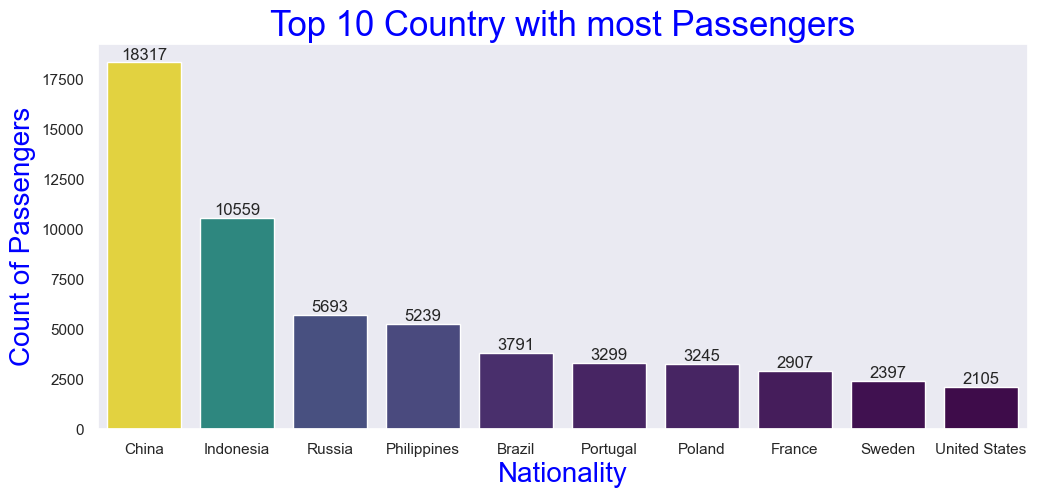

In [20]:
top_ten = df.groupby("Nationality",as_index = False)["Passenger ID"].count().sort_values(by = "Passenger ID",ascending = False).head(10)
sns.set(rc = {"figure.figsize":(12,5)})
ax = sns.barplot(x = "Nationality",y = "Passenger ID",hue = "Passenger ID",palette = "viridis",data = top_ten,legend = False)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Top 10 Country with most Passengers",color = "blue",size = 25)
plt.xlabel("Nationality",color = "blue",size = 20)
plt.ylabel("Count of Passengers",color = "blue",size = 20)
plt.grid(False)
plt.show()

# Top 10 most serviceable Airports

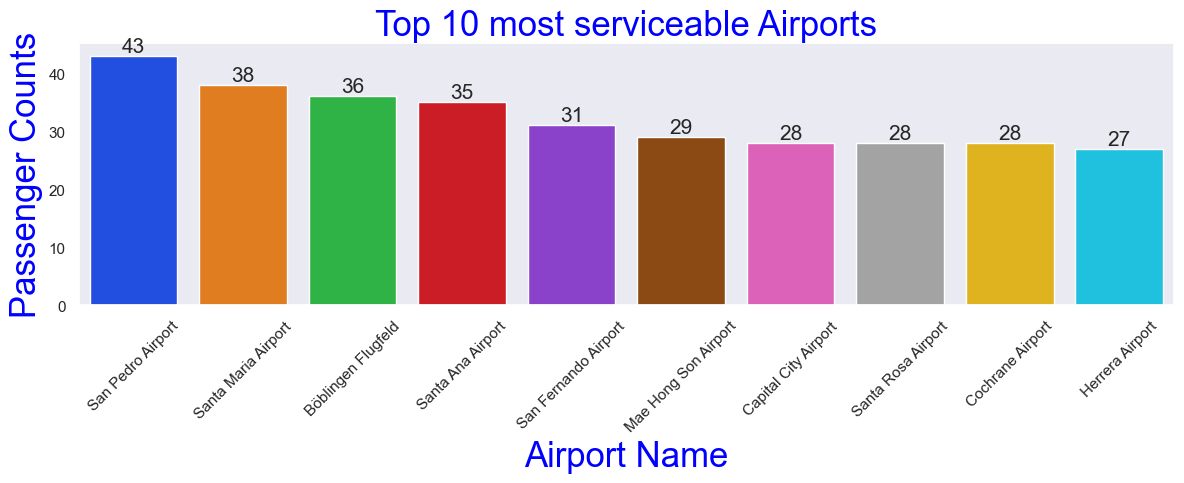

In [21]:
air_port = df.groupby(["Airport Name"],as_index = False)["Passenger ID"].count().sort_values(by = "Passenger ID",ascending = False).head(10)
sns.set(rc = {"figure.figsize":(12,5)})
ax = sns.barplot(x = "Airport Name",y = "Passenger ID",hue = "Airport Name",palette = "bright",data = air_port)
for bar in ax.containers:
    ax.bar_label(bar,size = 15)
plt.title("Top 10 most serviceable Airports",color = "blue",size = 25)
plt.xlabel("Airport Name",color = "blue",size = 25)
plt.ylabel("Passenger Counts",color = "blue",size = 25)
plt.xticks(rotation = 45)
plt.grid(False)
plt.tight_layout()
plt.show()

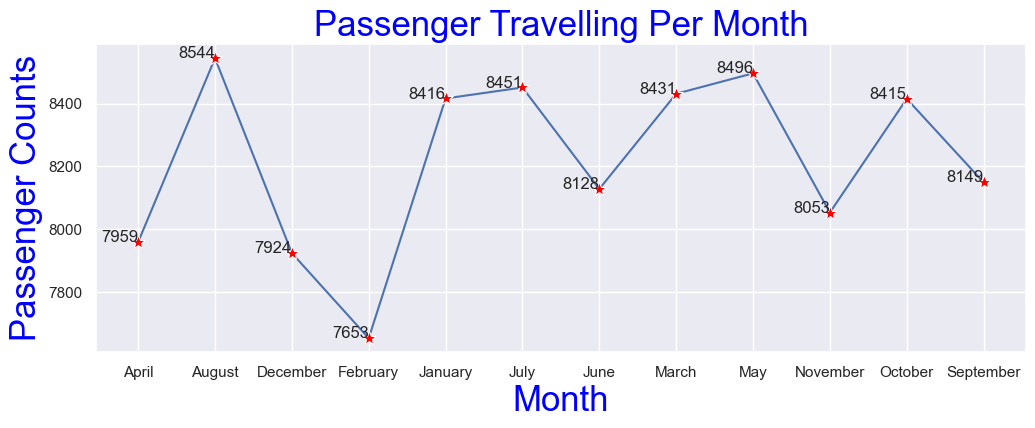

In [22]:
mon_pas = df.groupby("month",as_index = False)["Passenger ID"].count()
sns.set(rc = {"figure.figsize":(12,4)})
ax = sns.lineplot(data = mon_pas,x = "month",y = "Passenger ID",marker = "*",markerfacecolor = "red",markersize = 10)
for i,v in enumerate(mon_pas["Passenger ID"]):
    ax.text(i,v,str(v),ha = "right")
plt.title("Passenger Travelling Per Month",color = "blue",size = 25)
plt.xlabel("Month",color = "blue",size = 25)
plt.ylabel("Passenger Counts",color = "blue",size = 25)
plt.show()

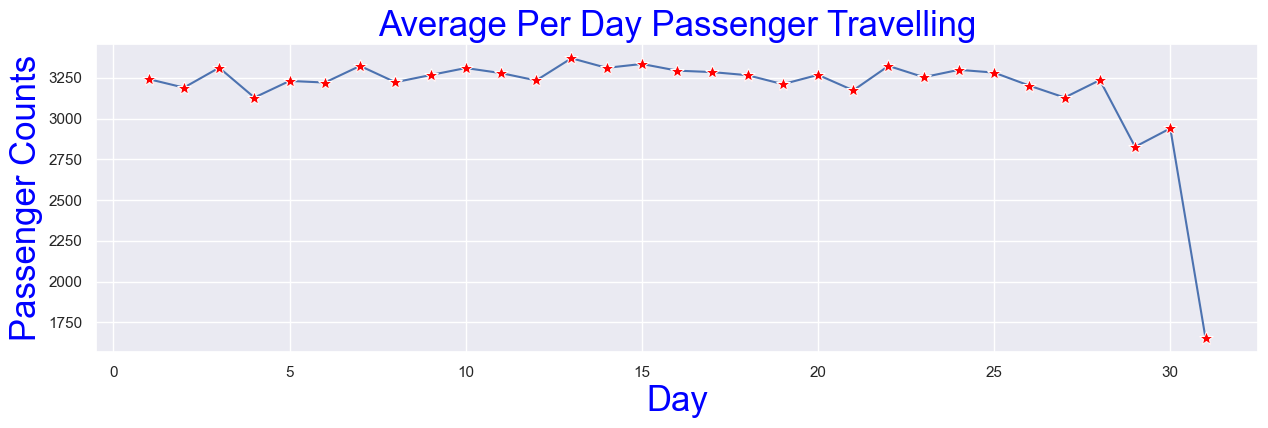

In [23]:
avg_per_day = df.groupby("day",as_index = False)["Passenger ID"].count()
sns.set(rc = {"figure.figsize":(15,4)})
ax = sns.lineplot(data = avg_per_day,x = "day",y = "Passenger ID",marker = "*",markerfacecolor = "red",markersize = 10)
plt.title("Average Per Day Passenger Travelling",color = "blue",size = 25)
plt.xlabel("Day",color = "blue",size = 25)
plt.ylabel("Passenger Counts",color = "blue",size = 25)
plt.show()

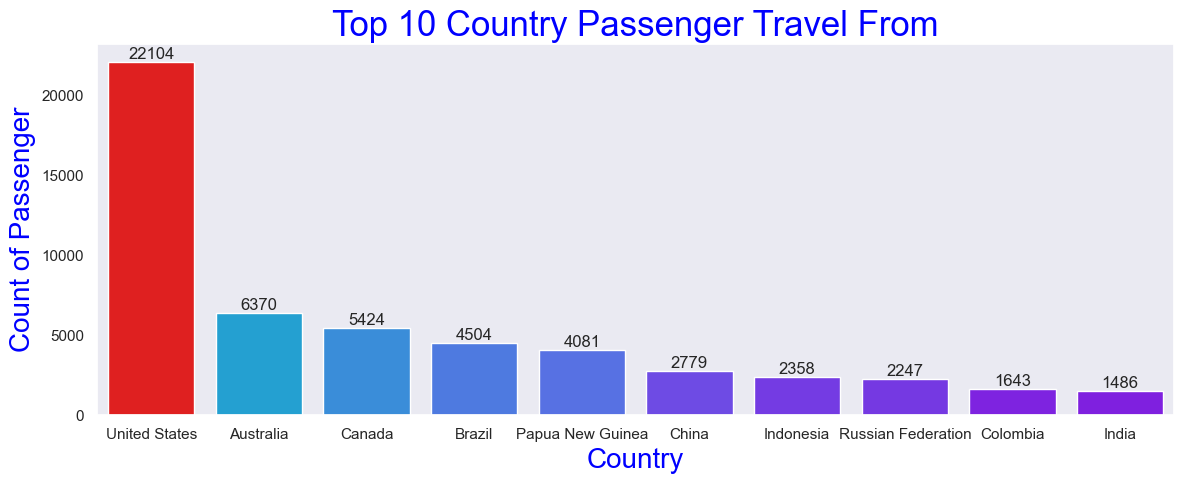

In [24]:
by_country = df.groupby("Country Name",as_index = False)["Passenger ID"].count().sort_values(by = "Passenger ID",ascending = False).head(10)
sns.set(rc = {"figure.figsize":(12,5)})
ax = sns.barplot(data = by_country, x = "Country Name",y = "Passenger ID",hue = "Passenger ID",palette = "rainbow",legend = False)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Top 10 Country Passenger Travel From",color = "blue",size = 25)
plt.xlabel("Country",color = "blue",size = 20)
plt.ylabel("Count of Passenger",color = "blue",size = 20)
plt.grid(False)
plt.tight_layout()
plt.show()

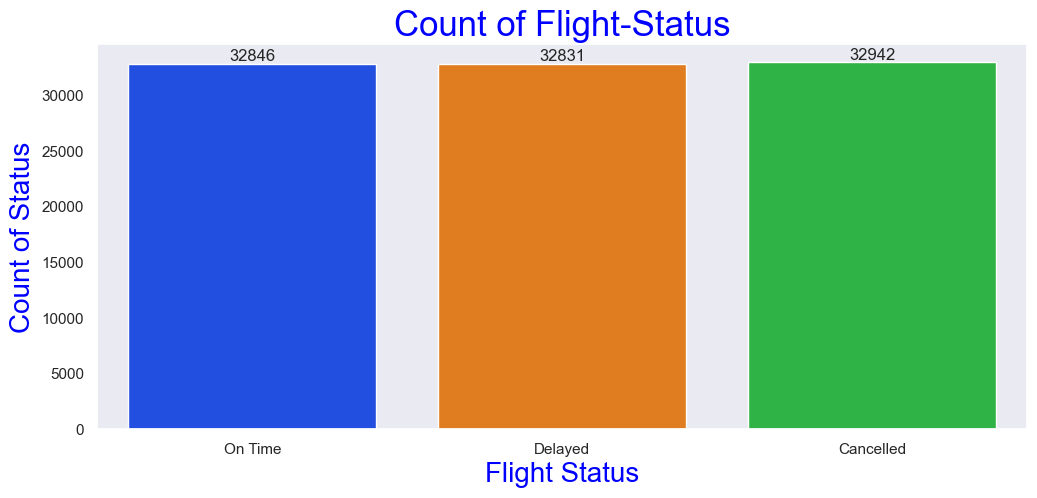

In [25]:
ax = sns.countplot(x = "Flight Status",hue = "Flight Status",palette = "bright",data = df)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Count of Flight-Status",color = "blue",size = 25)
plt.xlabel("Flight Status",color = "blue",size = 20)
plt.ylabel("Count of Status",color = "blue",size = 20)
plt.grid(False)
plt.show()

# Most Flights by Continents

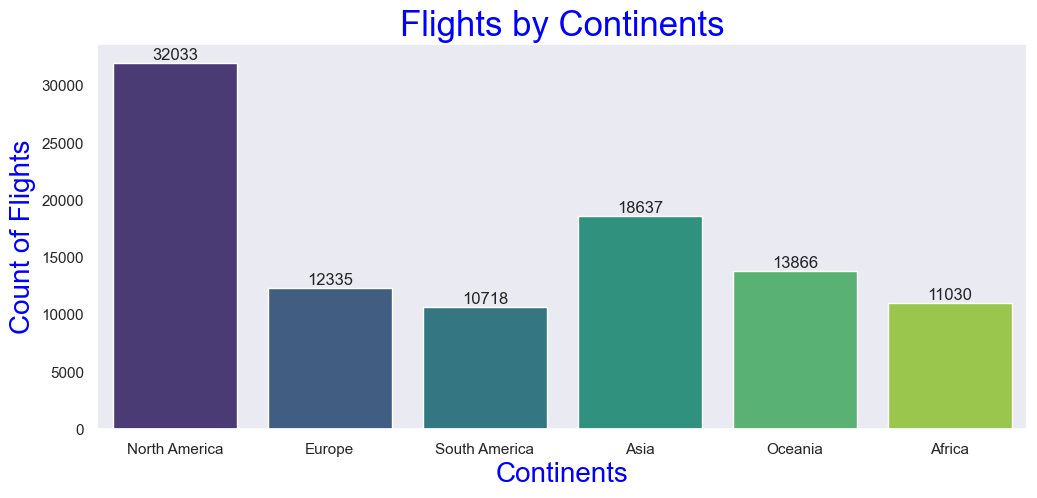

In [26]:
ax = sns.countplot(data = df,x = "Continents",hue = "Continents",palette = "viridis")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Flights by Continents",color = "blue",size = 25)
plt.xlabel("Continents",color = "blue",size = 20)
plt.ylabel("Count of Flights",color = "blue",size = 20)
plt.grid(False)
plt.show()

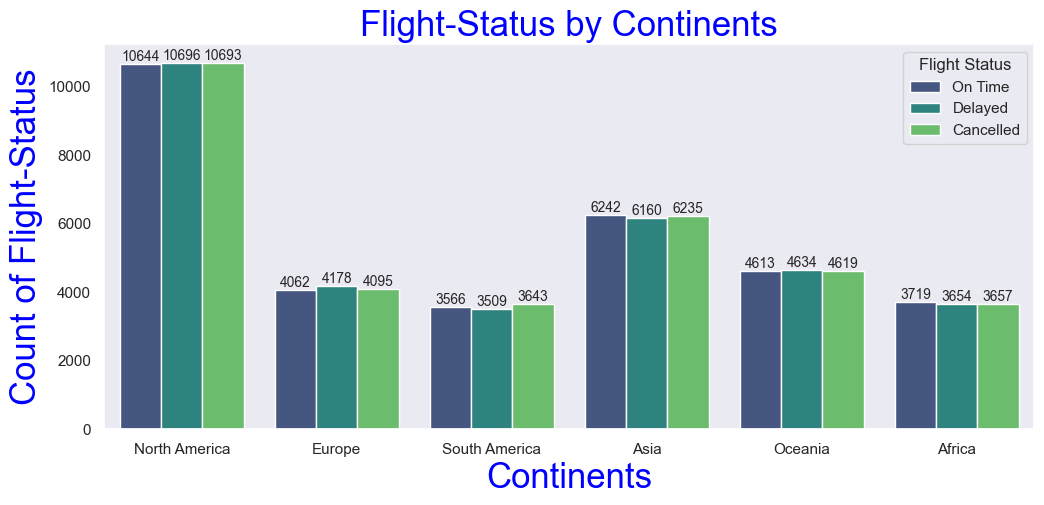

In [27]:
ax = sns.countplot(data = df,x = "Continents" ,hue = "Flight Status",palette = "viridis")
for bar in ax.containers:
    ax.bar_label(bar,size = 10)
plt.title("Flight-Status by Continents",color = "blue",size = 25)
plt.xlabel("Continents",color = "blue",size = 25)
plt.ylabel("Count of Flight-Status",color = "blue",size = 25)
plt.grid(False)
plt.show()

In [28]:
df["Arrival Airport"].unique()

array(['CXF', 'YCO', 'GNB', ..., 'CXM', 'ROR', 'HPN'], dtype=object)

In [29]:
arrival_airport = df.groupby(["Continents","Arrival Airport"],as_index = False)["Passenger ID"].count().sort_values(by = "Passenger ID",ascending = False).head(10)

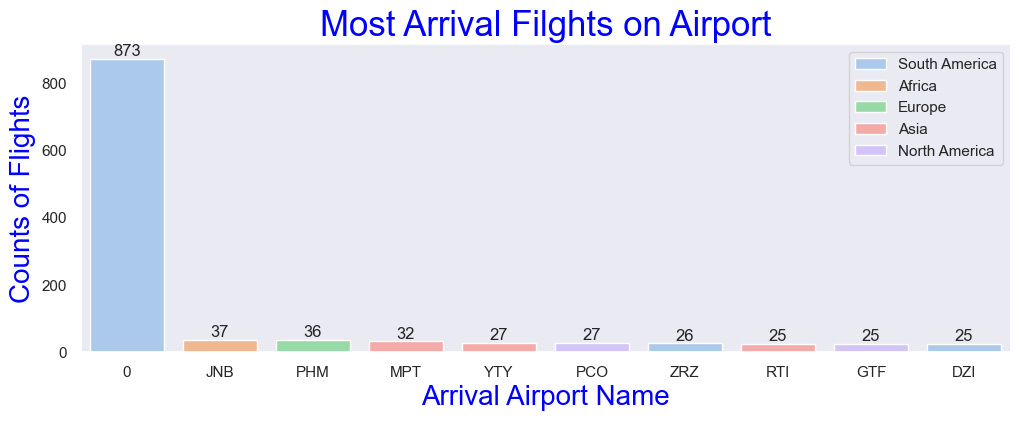

In [30]:
sns.set(rc = {"figure.figsize":(12,4)})
ax = sns.barplot(data = arrival_airport, x = "Arrival Airport",y = "Passenger ID",hue = "Continents",palette = "pastel")
for x in ax.containers:
    ax.bar_label(x)
plt.title("Most Arrival Filghts on Airport",color = "blue",size = 25)
plt.xlabel("Arrival Airport Name",color = "blue",size = 20)
plt.ylabel("Counts of Flights",color = "blue",size = 20)
plt.legend(loc = "best",bbox_to_anchor = (1,1))
plt.grid(False)
plt.show()

In [31]:
df["Arrival Airport"].replace("0",method = "ffill",inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_20124\1518501639.py:1: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df["Arrival Airport"].replace("0",method = "ffill",inplace = True)


In [32]:
arrival_airport = df.groupby(["Continents","Arrival Airport"],as_index = False)["Passenger ID"].count().sort_values(by = "Passenger ID",ascending = False).head(10)

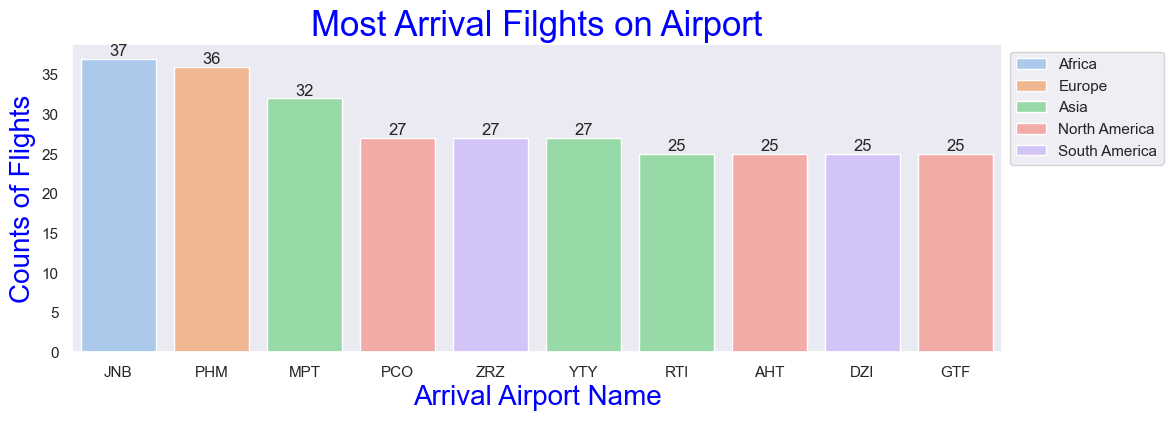

In [33]:
sns.set(rc = {"figure.figsize":(12,4)})
ax = sns.barplot(data = arrival_airport, x = "Arrival Airport",y = "Passenger ID",hue = "Continents",palette = "pastel")
for x in ax.containers:
    ax.bar_label(x)
plt.title("Most Arrival Filghts on Airport",color = "blue",size = 25)
plt.xlabel("Arrival Airport Name",color = "blue",size = 20)
plt.ylabel("Counts of Flights",color = "blue",size = 20)
plt.legend(loc = "best",bbox_to_anchor = (1,1))
plt.grid(False)
plt.show()